In [1]:
from act.cell_model import TargetCell, TrainCell
from act.simulator import Simulator
from act.act_types import SimulationParameters
# /Users/vladimiromelyusik/ACT/data/Burster/Izhikevich_p307_orig/template.hoc
# /Users/vladimiromelyusik/ACT/data/Burster/Izhikevich_p307_orig/modfiles
hoc_file = "/home/mwsrgf/proj/ACT/data/Burster/Izhikevich_p307_orig/template.hoc"
mod_folder = "/home/mwsrgf/proj/ACT/data/Burster/Izhikevich_p307_orig/modfiles"

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


### 1. Generate target data

In [2]:
# Init the cell
target_cell = TargetCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)

current_intensities = [0.1, 0.2, 0.3]

In [3]:
# Simulate a voltage trace
simulator = Simulator()
for i in range(len(current_intensities)):
    simulator.submit_job(
        target_cell,
        SimulationParameters(
            sim_name = "target1",
            sim_idx=i,
            h_v_init = -70, # (mV)
            h_tstop = 300,  # (ms)
            h_dt = 0.01, # (ms)
            h_celsius = 37, # (deg C)
            CI = {
                "type": "constant",
                "amp": current_intensities[i],
                "dur": 290,
                "delay": 10
            }
        )
    )
# simulator.submit_job(...)
# simulator.submit_job(...)

In [4]:
# Run
simulator.run(mod_folder)

from act.DataProcessor import DataProcessor
dp = DataProcessor()
dp.combine_data("./model/target1")


Total number of jobs: 3
Total number of proccessors: 192


In [5]:
import numpy as np
dataset = np.load("./model/target1/combined_out.npy")

dp = DataProcessor()
g = dp.clean_g_bars(dataset)

print(dataset[:,:,1])

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 

### 2. Generate simulated data

#### Get Passive Properties

Total number of jobs: 1
Total number of proccessors: 192
MECHANISMS already loaded.
Found 1 section(s) in this cell. Calculating the total surface area of the cell.


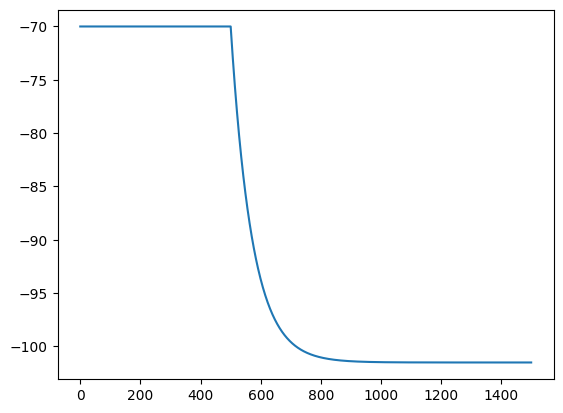

In [6]:
# Predict passive properties
from act.DataProcessor import DataProcessor
from act.cell_model import TrainCell
import matplotlib.pyplot as plt
import numpy as np

# Init the cell
train_cell = TrainCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)

# Simulate a negative current injection and get all of the data needed to calculate the passive properties.
# This is a stand in for data from a target cell.
dp = DataProcessor()
(
V,
dt, 
h_tstop, 
I_tstart, 
I_intensity,
cell_area
) = dp.simulate_negative_CI(train_cell, "glbar_leak")

plt.plot(V)

In [7]:
dp = DataProcessor()
props = dp.calculate_passive_properties(V, dt,h_tstop,I_tstart,I_intensity,cell_area,"glbar_leak")

print(props)

{'leak_conductance_variable': 'glbar_leak', 'g_bar_leak': 3.500002954275104e-05, 'r_in': 315.19618835592127, 'tau': 72.0, 'v_rest': -70.0, 'Cm': 0.2284291582825145}


In [8]:
from act.cell_model import TrainCell

# Init the cell
train_cell = TrainCell(
    hoc_file = hoc_file,
    mod_folder= mod_folder,
    cell_name = "Burster_Izh",
    g_names = ["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"]
)
'''
{"channel": "gbar_nap", "high": 0.0006, "low": 0.0001},
{"channel": "gmbar_im", "high": 0.0033, "low": 0.00066667},
{"channel": "gbar_na3", "high": 0.06, "low": 0.01},
{"channel": "gkdrbar_kdr", "high": 0.056, "low": 0.01},
'''
channel_ranges = [
    (0.0001, 0.0006),  
    (0.01, 0.056),
    (0.01, 0.06),
    (0.00066667, 0.0033),
    (props['g_bar_leak'],props['g_bar_leak']) # We know this conductance
]
channel_samples = [2, 3, 2, 2, 1]
#current_intensities = [0.1, 0.2, 0.3] # same as target_cell. comment out if wanting one control spot
conductance_groups, current_settings = train_cell.generate_I_g_combinations(channel_ranges, channel_samples, current_intensities)

In [9]:
print(len(conductance_groups))
print(conductance_groups[0])
print(conductance_groups[71])


72
(0.0001, 0.01, 0.01, 0.00066667, 3.500002954275104e-05)
(0.0006, 0.056, 0.06, 0.0033, 3.500002954275104e-05)


In [10]:
# Simulate voltage traces
simulator = Simulator()

for i in range(len(conductance_groups)):
        # Set parameters from the grid
        train_cell.set_g(["gbar_nap", "gkdrbar_kdr", "gbar_na3", "gmbar_im", "glbar_leak"], conductance_groups[i])
        simulator.submit_job(
            train_cell, 
            SimulationParameters(
                sim_name = "train1",
                sim_idx = i,
                h_v_init = -70, # (mV)
                h_tstop = 300,  # (ms)
                h_dt = 0.01, # (ms)
                h_celsius = 37, # (deg C)
                CI = {
                    "type": "constant",
                    "amp": current_settings[i],
                    "dur": 290,
                    "delay": 10
                }
            )
        )
# simulator.submit_job(...)
# simulator.submit_job(...)

In [11]:
# Run
simulator.run(mod_folder)

from act.DataProcessor import DataProcessor
dp = DataProcessor()
dp.combine_data("./model/train1")

Total number of jobs: 72
Total number of proccessors: 192
MECHANISMS already loaded.


In [ ]:
# MatchFilter will go over saved data and create a dataset of the traces that match,
# deleting others

## 3. Train the model

In [1]:
# Check that the target data is shaped correctly
import numpy as np
from act.DataProcessor import DataProcessor
dataset = np.load("./model/train1/combined_out.npy")
print(dataset.shape)
#print(dataset[:,:,2])
    
# Function to remove NaNs from a single row

dp = DataProcessor()
g = dp.clean_g_bars(dataset)








/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


(72, 300, 3)


(300,)
[-70.         -70.01278198 -70.02530184 -70.03756983 -70.04959575
 -70.06138899 -70.07295851 -70.08431279 -70.09545973 -70.10640667
 -70.11716055 -69.6911089  -69.27381251 -68.86489962 -68.46400592
 -68.07077264 -67.68484663 -67.30587984 -66.93352892 -66.56745438
 -66.20731986 -65.85279109 -65.50353504 -65.15921873 -64.81950812
 -64.48406695 -64.15255524 -63.824628   -63.49993362 -63.17811194
 -62.85879246 -62.54159207 -62.22611239 -61.91193691 -61.59862762
 -61.28572104 -60.97272338 -60.65910504 -60.34429397 -60.02766753
 -59.70854242 -59.38616264 -59.05968432 -58.7281565  -58.39049677
 -58.0454601  -57.69159762 -57.32720225 -56.95023527 -56.55822459
 -56.1481223  -55.71609778 -55.25723024 -54.76503422 -54.23069693
 -53.64178897 -52.9799458  -52.21635725 -51.30204366 -50.14372255
 -48.53019779 -45.81801441 -38.29985965   3.25668264   9.99586436
   1.65629294  -9.04404436 -18.78516923 -26.76662315 -32.875491
 -37.31383025 -40.52134969 -42.89403228 -44.66420872 -45.95563971
 -46.

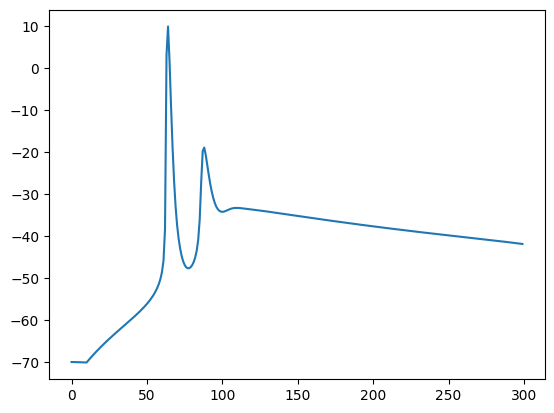

In [8]:
import torch
import matplotlib.pyplot as plt
dp = DataProcessor()
V = dataset[:,:,0]
I = dataset[:,:,1]

print(V[0].shape)
print(V[0])

V_sample = torch.Tensor(V[0]).unsqueeze(0)

plt.plot(V[0])
#summary_features, column_names = dp.extract_features(V, I, inj_dur=290, inj_start=10, fs=10)
features, columns = dp.get_spike_stats(V_sample, 1)

print(columns)
print(features)

In [16]:
print(V.shape)

(72, 300)


In [23]:
import torch
def extract_spike_features(V: torch.Tensor, spike_threshold=0, n_spikes=20):
    # Get the number of threshold crossings
    threshold_crossings = torch.diff(V > spike_threshold, dim=1)

    # Get the number of spikes
    num_spikes = torch.round(torch.sum(threshold_crossings, dim=1) * 0.5)

    # Get the interspike times
    interspike_times = torch.zeros((V.shape[0], 1))
    for i in range(threshold_crossings.shape[0]):
        interspike_times[i, :] = torch.mean(
            torch.diff(
                torch.arange(threshold_crossings.shape[1])[threshold_crossings[i, :]]
            ).float()
        )
    interspike_times[torch.isnan(interspike_times)] = 0

    
    first_n_spikes = torch.zeros((V.shape[0], n_spikes)) * V.shape[1]
    avg_spike_min = torch.zeros((V.shape[0], 1))
    avg_spike_max = torch.zeros((V.shape[0], 1))
    for i in range(threshold_crossings.shape[0]):
        threshold_crossing_times = torch.arange(threshold_crossings.shape[1])[
            threshold_crossings[i, :]
        ]
        spike_times = []
        spike_mins = []
        spike_maxes = []
        for j in range(0, threshold_crossing_times.shape[0], 2):
            spike_times.append(threshold_crossing_times[j])
            ind = threshold_crossing_times[j : j + 2].cpu().tolist()
            end_ind = ind[1] if len(ind) == 2 else V.shape[1]
            spike_maxes.append(
                V[i][max(0, ind[0] - 1) : min(end_ind + 5, V.shape[1])].max()
            )
            spike_mins.append(
                V[i][max(0, ind[0] - 1) : min(end_ind + 5, V.shape[1])].min()
            )
        first_n_spikes[i][: min(n_spikes, len(spike_times))] = torch.tensor(
            spike_times
        ).flatten()[: min(n_spikes, len(spike_times))]
        avg_spike_max[i] = torch.mean(torch.tensor(spike_maxes).flatten())
        avg_spike_min[i] = torch.mean(torch.tensor(spike_mins).flatten())
        first_n_spikes_scaled = (
            first_n_spikes / V.shape[1]
        )  # may be good to return this
    return num_spikes, interspike_times, first_n_spikes_scaled, avg_spike_min, avg_spike_max

    

tensor([[-0.0650, -0.0645, -0.0640,  ..., -0.0636, -0.0636, -0.0636]],
       dtype=torch.float64)
tensor([12.])
tensor([[415.5218]])
tensor([[0.0076, 0.1024, 0.1890, 0.2748, 0.3603, 0.4458, 0.5311, 0.6166, 0.7021,
         0.7876, 0.8730, 0.9585, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000]])
tensor([[0.0113]])
tensor([[-0.0020]])


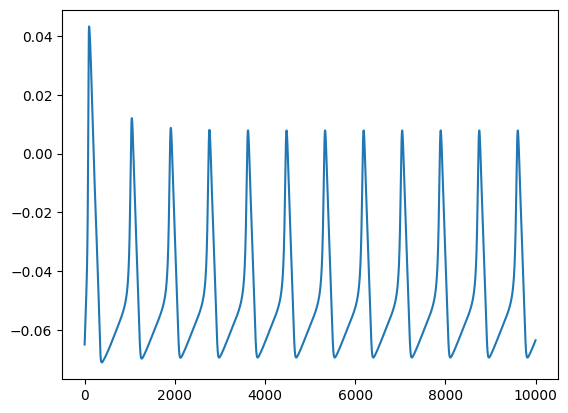

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch
test_trace = np.load("test_trace.npy")
trace = []
for i in test_trace:
    i = i/1000
    trace.append(i)


trace = torch.tensor(trace).unsqueeze(0)


print(trace)

# Print the shape to confirm it's now a 2D tensor
#print(trace_2d.shape)

plt.plot(trace[0].cpu().numpy())


(   num_spikes_simulated,
    simulated_interspike_times,
    first_n_spikes, 
    avg_spike_min,
    avg_spike_max
) = extract_spike_features(trace)

print(num_spikes_simulated)
print(simulated_interspike_times)
print(first_n_spikes)
print(avg_spike_max)
print(avg_spike_min)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time parameters
total_time = 1.0  # total time in seconds
step_start_time = 0.1  # step start time in seconds
step_end_time = 0.75  # step end time in seconds
step_value = 500  # step value in pA

# Define the sampling rate and create a time array
sampling_rate = 10000  # samples per second
time_array = np.linspace(0, total_time, int(total_time * sampling_rate))

# Generate the step input signal
step_input = np.zeros_like(time_array)
step_input[(time_array >= step_start_time) & (time_array <= step_end_time)] = step_value

# Plot the step input signal
plt.plot(time_array, step_input)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (pA)')
plt.title('Step Input Signal')
plt.grid(True)
plt.show()

In [ ]:
from act.DataProcessor import DataProcessor as dp
import matplotlib.pyplot as plt
import numpy as np
import torch
test_trace = np.load("test_trace.npy")
trace = []
for i in test_trace:
    i = i/1000
    trace.append(i)


trace = torch.tensor(trace).unsqueeze(0)

print(trace)



features, columns = dp.get_spike_stats(dp, trace)

print(columns)
print(features)

In [ ]:
from act.DataProcessor import DataProcessor
import matplotlib.pyplot as plt
import numpy as np
import torch

# Voltage Trace
test_trace = np.load("test_trace.npy")
trace = []
for i in test_trace:
    i = i/1000
    trace.append(i)


trace = torch.tensor(trace).unsqueeze(0)

#print(trace)

# Current Input
total_time = 1.0 
step_start_time = 0.1  
step_end_time = 0.75  
step_value = 500  

sampling_rate = 10000  
time_array = np.linspace(0, total_time, int(total_time * sampling_rate))


step_input = np.zeros_like(time_array)
step_input[(time_array >= step_start_time) & (time_array <= step_end_time)] = step_value

step_input = torch.Tensor(step_input)
# Test Dataprocessor
dp = DataProcessor()
features_to_extract = ["spikes","current"]
features, columns = dp.extract_features(features_to_extract, V=trace, I=step_input)

print(columns)
print(features)